In [9]:
import re
import matplotlib.pyplot as plt
import sys
from pathlib import Path

notebook_dir = Path.cwd() 
project_root = notebook_dir.parent
sys.path.append(str(project_root))

log_file = project_root / "logs" / "training_log_cnn_X2.txt"
if log_file.exists():
    with open(log_file, 'r') as file:
        log_data = file.readlines()
else:
    print(f"Log file not found: {log_file}")

warmup_epochs = {}
training_epochs = {}


In [10]:
for line in log_data:
    line = line.strip()
    warmup_match = re.match(r'Warmup Epoch (\d+), Batch (\d+): MAE Loss = ([\d\.]+)', line)
    if warmup_match:
        epoch = int(warmup_match.group(1))
        mae_loss = float(warmup_match.group(3))
        if epoch not in warmup_epochs:
            warmup_epochs[epoch] = []
        warmup_epochs[epoch].append(mae_loss)
    else:
        training_match = re.match(r'Epoch (\d+), Batch (\d+): (.+)', line)
        if training_match:
            epoch = int(training_match.group(1))
            metrics_str = training_match.group(3)
            metrics = {}
            for metric in metrics_str.split(', '):
                key_value = metric.strip().split(' = ')
                if len(key_value) == 2:
                    key, value = key_value
                    try:
                        metrics[key] = float(value)
                    except ValueError:
                        pass
            if epoch not in training_epochs:
                training_epochs[epoch] = {}
            for key, value in metrics.items():
                if key not in training_epochs[epoch]:
                    training_epochs[epoch][key] = []
                training_epochs[epoch][key].append(value)




In [11]:
warmup_avg = {epoch: sum(losses) / len(losses) for epoch, losses in warmup_epochs.items()}

training_avg = {}
for epoch, metrics in training_epochs.items():
    training_avg[epoch] = {key: sum(values) / len(values) for key, values in metrics.items()}


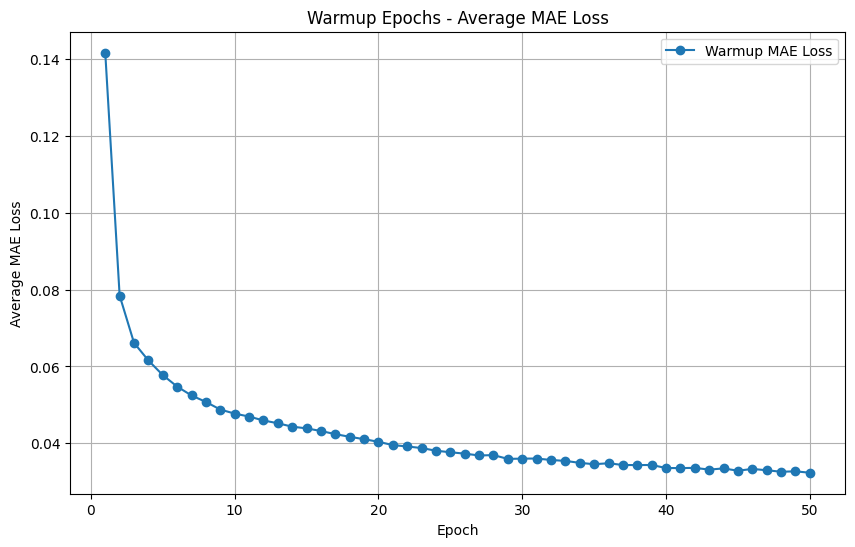

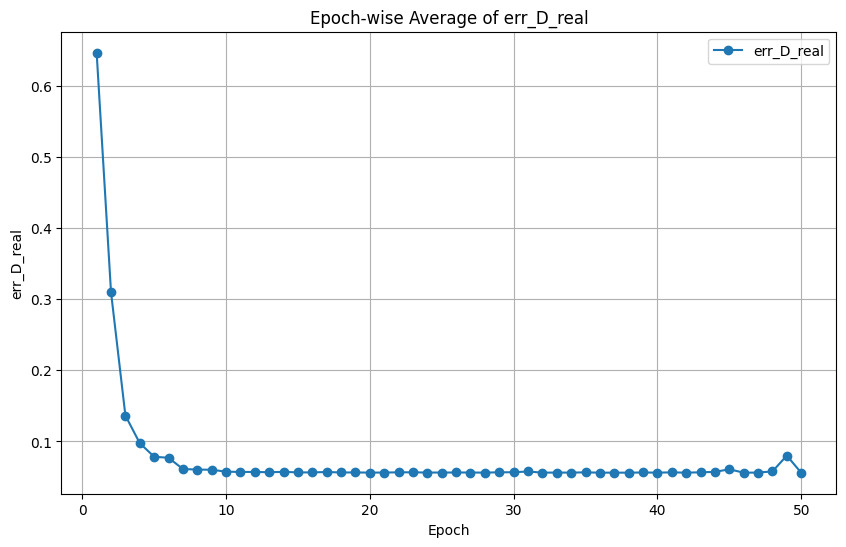

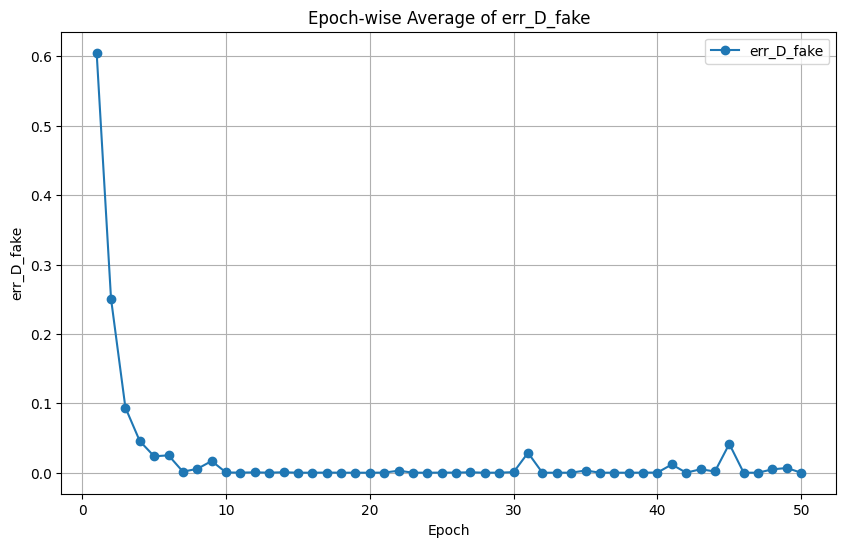

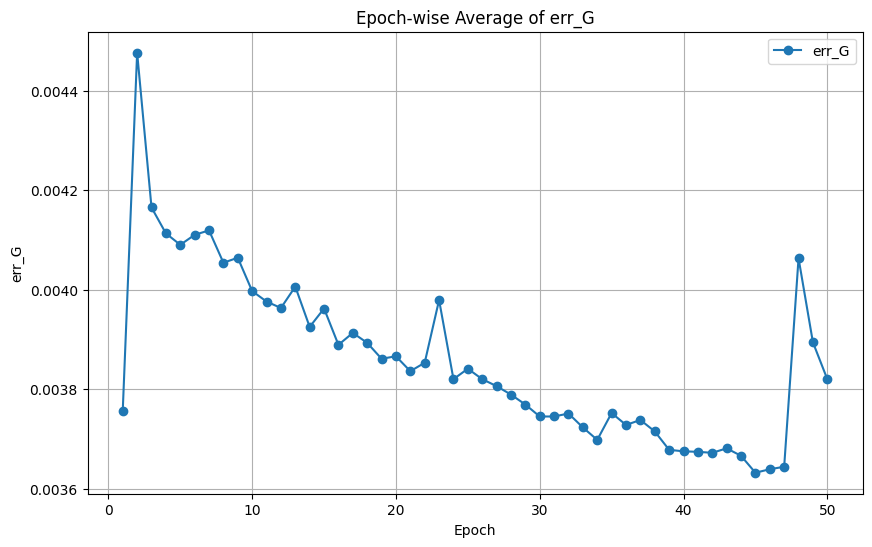

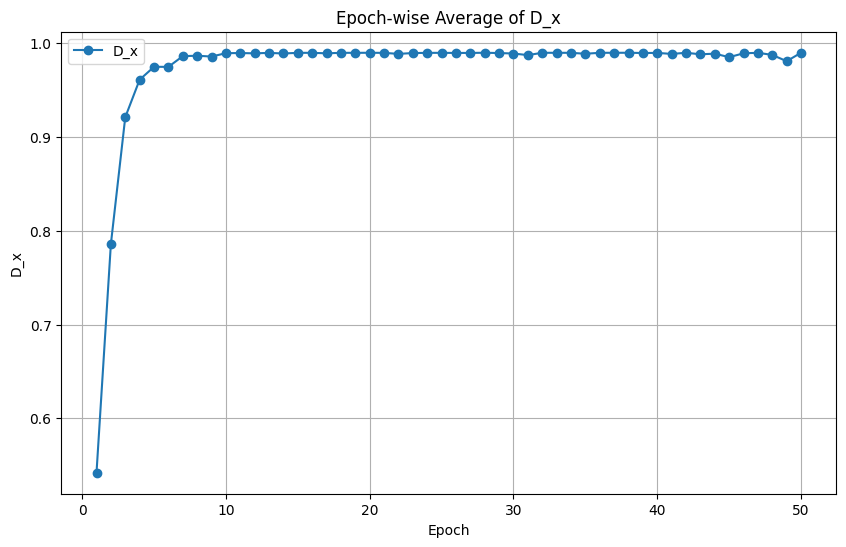

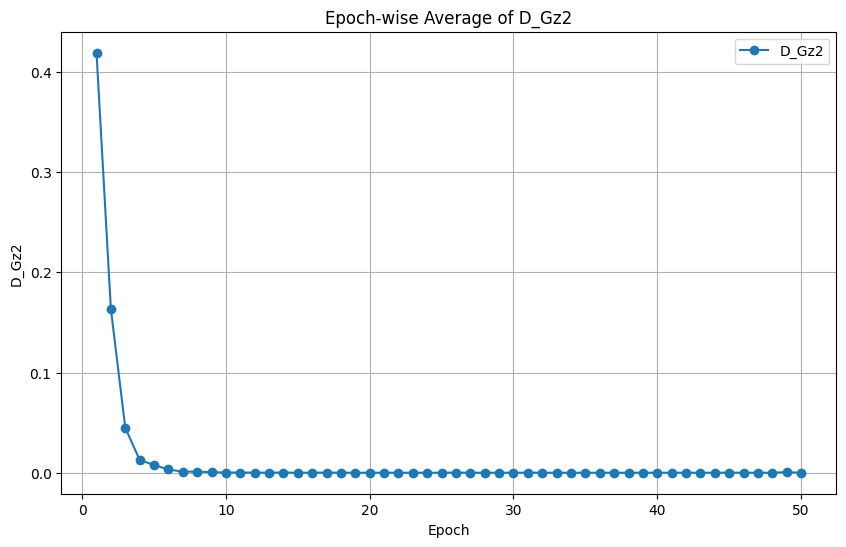

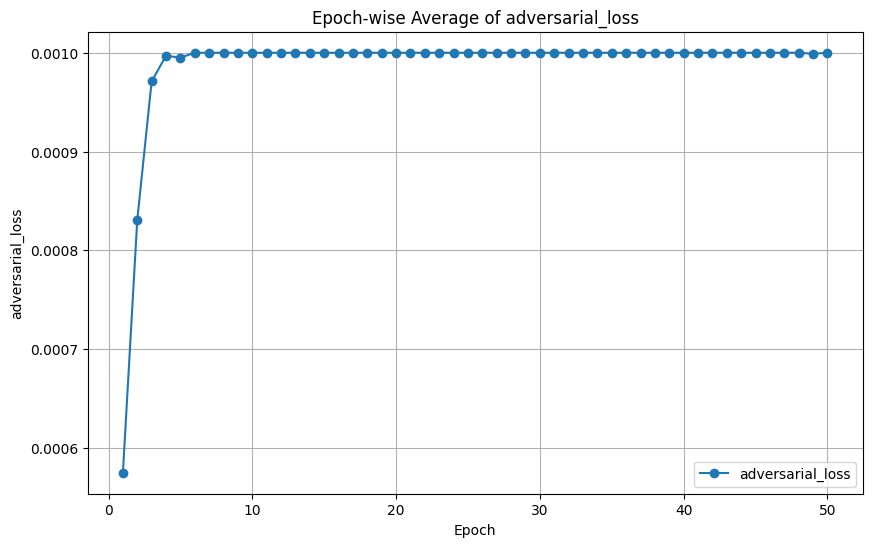

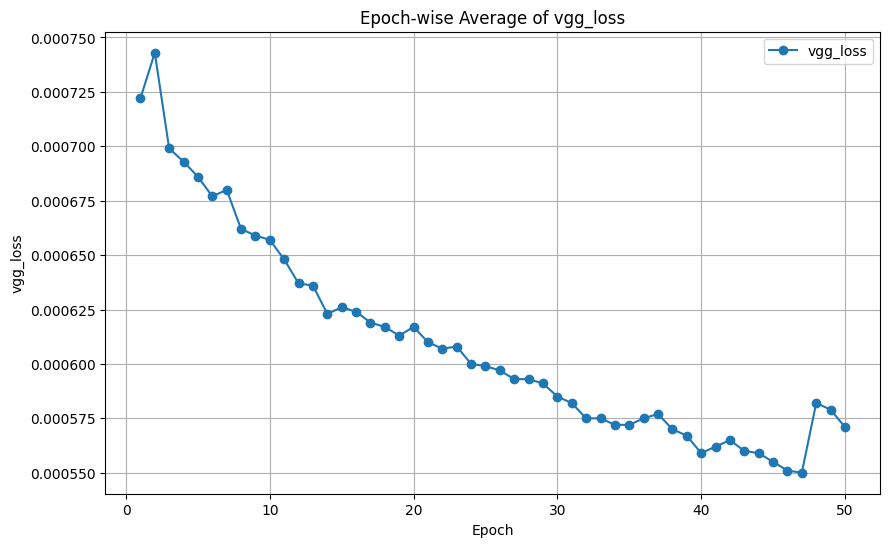

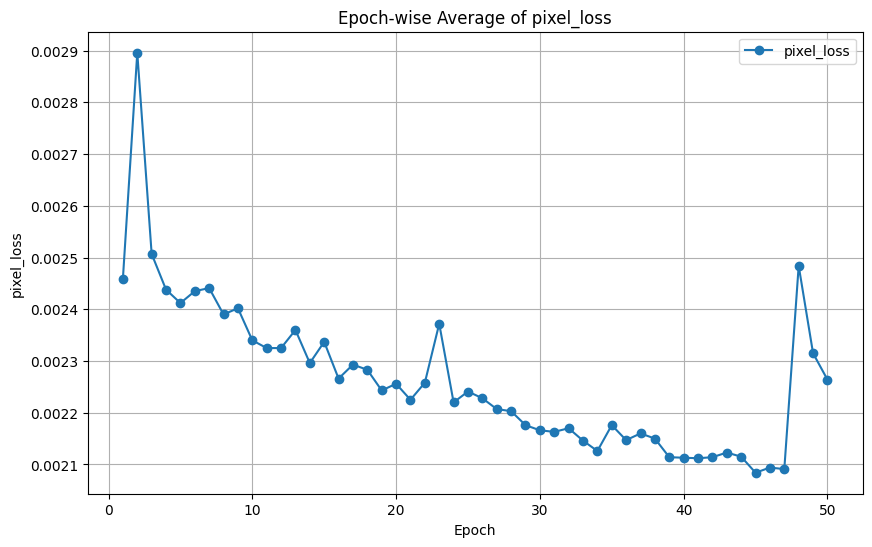

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(list(warmup_avg.keys()), list(warmup_avg.values()), marker='o', label='Warmup MAE Loss')
plt.title('Warmup Epochs - Average MAE Loss')
plt.xlabel('Epoch')
plt.ylabel('Average MAE Loss')
plt.grid(True)
plt.legend()
plt.show()

for metric_name in training_avg[next(iter(training_avg))].keys(): 
    x_epochs = list(training_avg.keys())
    y_values = [training_avg[epoch][metric_name] for epoch in x_epochs]

    plt.figure(figsize=(10, 6))
    plt.plot(x_epochs, y_values, marker='o', label=f'{metric_name}')
    plt.title(f'Epoch-wise Average of {metric_name}')
    plt.xlabel('Epoch')
    plt.ylabel(metric_name)
    plt.grid(True)
    plt.legend()
    plt.show()